In [18]:
#Import all the necessary modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn import linear_model

from sklearn import metrics

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn import preprocessing

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.shape

(149087, 21)

In [4]:
train.sample(5)

,Sno,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,...,Job Code,Job,Employee Identifier,Overtime,Other Salaries,Retirement,Health/Dental,Other Benefits,Total Benefits,Class
144014,19572,Fiscal,2015,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,...,2320,Registered Nurse,40889,0.00,7239.99,29890.76,11944.47,9958.84,51794.07,3
31210,159905,Fiscal,2015,5,Culture & Recreation,AAM,AAM Asian Art Museum,790,"SEIU - Miscellaneous, Local 1021",8200,...,8226,Museum Guard,52925,0.00,0.00,0.00,2778.10,883.60,3661.70,1
25450,67106,Fiscal,2017,4,Community Health,DPH,DPH Public Health,250,"SEIU - Health Workers, Local 1021",2300,...,2312,Licensed Vocational Nurse,56225,8486.37,9330.65,13909.31,11989.01,7236.61,33134.93,2
129194,181907,Fiscal,2015,4,Community Health,DPH,DPH Public Health,250,"SEIU - Health Workers, Local 1021",2300,...,2303,Patient Care Assistant,375,175.60,1373.16,5966.67,6154.93,1828.00,13949.60,1
140148,114797,Fiscal,2017,6,General Administration & Finance,REG,REG Elections,790,"SEIU - Miscellaneous, Local 1021",1400,...,1404,Clerk,55566,314.62,0.00,0.00,135.15,60.50,195.65,1


In [5]:
# Drop individual salaray components.
train.drop(['Overtime', 'Other Salaries', 'Retirement', 'Health/Dental', 'Other Benefits'], axis = 1, inplace=True)

In [6]:
# Drop Redundant Information
train.drop(['Organization Group', 'Department', 'Union', 'Job Family', 'Job'], axis = 1, inplace=True)

In [7]:
train.drop(['Sno'], axis = 1, inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149087 entries, 0 to 149086
Data columns (total 10 columns):
Year Type                  149087 non-null object
Year                       149087 non-null int64
Organization Group Code    149087 non-null int64
Department Code            149087 non-null object
Union Code                 149087 non-null int64
Job Family Code            149087 non-null object
Job Code                   149087 non-null object
Employee Identifier        149087 non-null int64
Total Benefits             149087 non-null float64
Class                      149087 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 11.4+ MB


In [9]:
# drop Year Type as it contains a single value.
train.drop(['Year Type'], axis = 1, inplace=True)

In [10]:
# Map Department Code to Numerical Values
dc_le = preprocessing.LabelEncoder()
dc_le.fit(train['Department Code'])
train['Department Code'] = dc_le.transform(train['Department Code'])

# Map Job Family Code to Numerical Values
jfc_le = preprocessing.LabelEncoder()
jfc_le.fit(train['Job Family Code'])
train['Job Family Code'] = jfc_le.transform(train['Job Family Code'])

# Map Job Code to Numerical Values
jc_le = preprocessing.LabelEncoder()
jc_le.fit(train['Job Code'])
train['Job Code'] = jc_le.transform(train['Job Code'])

In [11]:
train.sample(50)

,Year,Organization Group Code,Department Code,Union Code,Job Family Code,Job Code,Employee Identifier,Total Benefits,Class
38933,2014,4,20,791,12,255,3339,29849.37,3
57560,2013,1,41,311,41,854,2403,147.49,1
48043,2013,2,17,39,37,696,21841,42078.03,3
52860,2014,2,37,790,42,864,13798,3338.51,1
14546,2017,1,41,790,4,121,6650,34515.73,2
127409,2016,2,37,790,47,967,19178,34442.53,2
52374,2014,2,19,21,0,14,32188,20958.69,2
121460,2015,4,20,791,12,255,13132,45252.47,3
57101,2016,2,37,253,47,994,27823,4972.76,1
94893,2017,2,37,21,28,550,21236,43869.45,3


In [12]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,149087.0,2015.072018,1.410452,2013.00,2014.000,2015.00,2016.0,2017.00
Organization Group Code,149087.0,2.976980,1.582080,1.00,2.000,2.00,4.0,7.00
Department Code,149087.0,28.015689,13.291544,0.00,20.000,23.00,37.0,55.00
Union Code,149087.0,491.154963,333.914881,1.00,216.000,535.00,790.0,990.00
Job Family Code,149087.0,29.772053,17.921042,0.00,12.000,29.00,47.0,61.00
Job Code,149087.0,639.181572,366.845032,0.00,310.000,619.00,994.0,1140.00
Employee Identifier,149087.0,28508.984465,16460.652590,1.00,14244.000,28520.00,42804.5,56987.00
Total Benefits,149087.0,26411.479840,16893.424789,-19814.44,9313.965,30311.56,38510.3,138503.52
Class,149087.0,2.014347,0.816750,1.00,1.000,2.00,3.0,3.00


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149087 entries, 0 to 149086
Data columns (total 9 columns):
Year                       149087 non-null int64
Organization Group Code    149087 non-null int64
Department Code            149087 non-null int32
Union Code                 149087 non-null int64
Job Family Code            149087 non-null int32
Job Code                   149087 non-null int32
Employee Identifier        149087 non-null int64
Total Benefits             149087 non-null float64
Class                      149087 non-null int64
dtypes: float64(1), int32(3), int64(5)
memory usage: 8.5 MB


In [14]:
X = train.drop('Class', axis=1)
y = train.pop('Class')

In [15]:
accuracy = []
labels = []

In [16]:
rfc_model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0)
accuracy_scores = cross_val_score(rfc_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('RandomForrest')

[0.92106499 0.9212609  0.9220605  0.92125562 0.92252482 0.91856721
 0.92312852 0.92406761 0.91990877 0.92312852]
0.9216967464926752


In [19]:
lgr_model = LogisticRegression(multi_class = 'auto', solver = 'lbfgs', random_state=0)
accuracy_scores = cross_val_score(lgr_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('LogisticRegression')

[0.87713768 0.87471496 0.87262727 0.87618217 0.87583848 0.87228334
 0.87295412 0.87751543 0.87550309 0.87536893]
0.8750125459323348


In [20]:
svc_model = LinearSVC()
accuracy_scores = cross_val_score(svc_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('SupportVectorClassifier')

[0.66682315 0.61099933 0.67576632 0.6199611  0.74778642 0.59746445
 0.63844915 0.5948484  0.6863429  0.75476254]
0.6593203770088296


In [21]:
gradBoost_model = GradientBoostingClassifier(n_estimators=100)
accuracy_scores = cross_val_score(gradBoost_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('GradientBoostingClassifier')

[0.94500704 0.94426559 0.94613992 0.94882286 0.94620338 0.94466058
 0.94714247 0.94962436 0.94714247 0.94714247]
0.946615115943878


In [22]:
bag_model = BaggingClassifier(n_estimators=50)
accuracy_scores = cross_val_score(bag_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('BaggingClassifier')

[0.96130374 0.95989269 0.96076196 0.96505466 0.96263751 0.959619
 0.96270459 0.9623692  0.96102764 0.96102764]
0.9616398610597917


In [23]:
adaboost_model = AdaBoostClassifier(n_estimators=100)
accuracy_scores = cross_val_score(adaboost_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('AdaBoostClassifier')

[0.90382939 0.90570087 0.90167013 0.90442015 0.9024014  0.89394956
 0.90132815 0.90253555 0.89146767 0.90468205]
0.9011984908761207


In [24]:
df = pd.DataFrame()
df['accuracy'] = accuracy
df['classifier'] = labels

Text(0.5, 0.98, 'Accuracy scores for different Classifier Models')

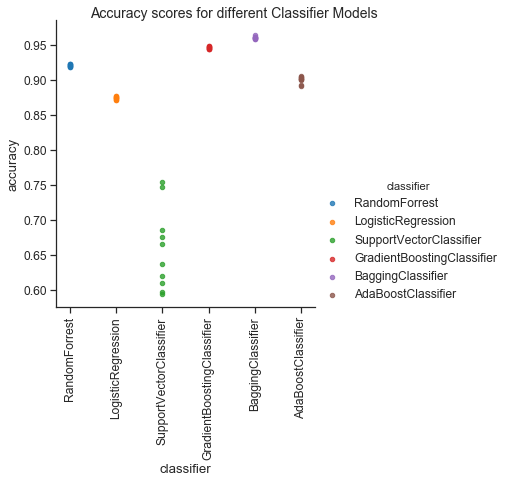

In [25]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
lm = sns.lmplot('classifier', # Horizontal axis
           'accuracy', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="classifier", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 20}) # S marker size

lm.set_xticklabels(rotation=90)
 
lm.fig.suptitle('Accuracy scores for different Classifier Models', fontsize=14)